In [1]:
# Copyright (c) 2020 Urbain Vaes. All rights reserved.
#
# This work is licensed under the terms of the MIT license.
# For a copy, see <https://opensource.org/licenses/MIT>.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('figure', figsize=(14, 8))
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('figure.subplot', hspace=.4)

# Fast simulation of stationary Gaussian processes

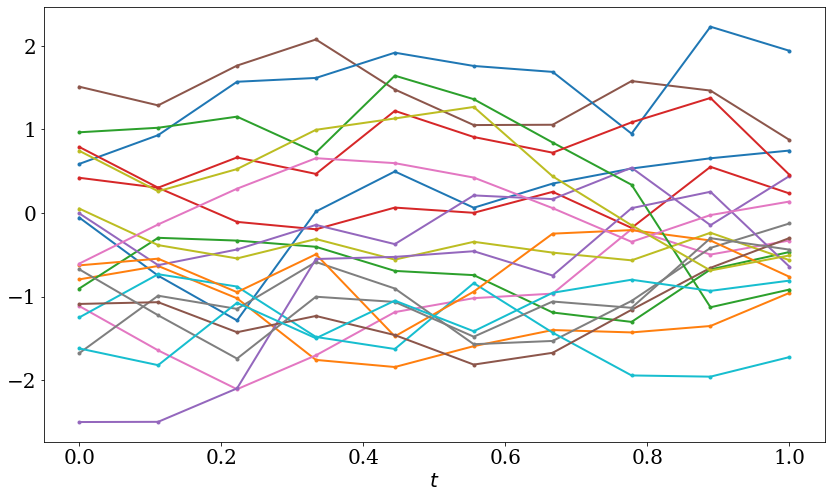

In [3]:
# Autocoraviance of a stationary OU process
def C(s):
    return np.exp(-s)

def gp_dft(t, n_paths):

    # Number of discritization points
    n = len(t)

    # Construction of vector c
    c = np.append(C(t), np.flip(C(t)[1:-1]))

    # Calculate DFT
    λ = np.fft.fft(c)

    def generate_paths(n_paths):
        Z1, Z2 = np.random.randn(2, n_paths, len(c))
        Z = Z1 + 1j * Z2
        Y = (np.sqrt(λ) * Z) / np.sqrt(len(c))
        V = np.fft.fft(Y, axis=1)
        return np.real(V[:, :n])

    return generate_paths(n_paths)


# Vector of times
n = 10
t = np.linspace(0, 1, n)

# Plots
fig, ax = plt.subplots()
ax.plot(t, gp_dft(t, n_paths=20).T, marker='.')
ax.set_xlabel("$t$")
plt.show()

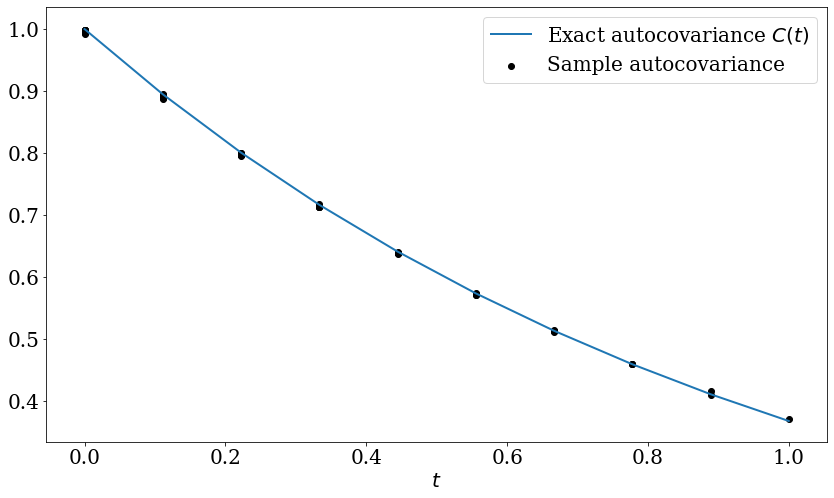

In [4]:
# Check that the autocovariance function is right
V = gp_dft(t, n_paths=10**5)
cov = np.cov(V.T)

fig, ax = plt.subplots()
ax.plot(t, C(t), label="Exact autocovariance $C(t)$")
for i in range(n):
    y_plot = np.diag(cov, i)
    x_plot = np.zeros(len(y_plot)) + t[i]
    label = "Sample autocovariance" if i == 0 else None
    ax.scatter(x_plot, y_plot, color='k', label=label)
ax.set_xlabel("$t$")
ax.legend()
plt.show()

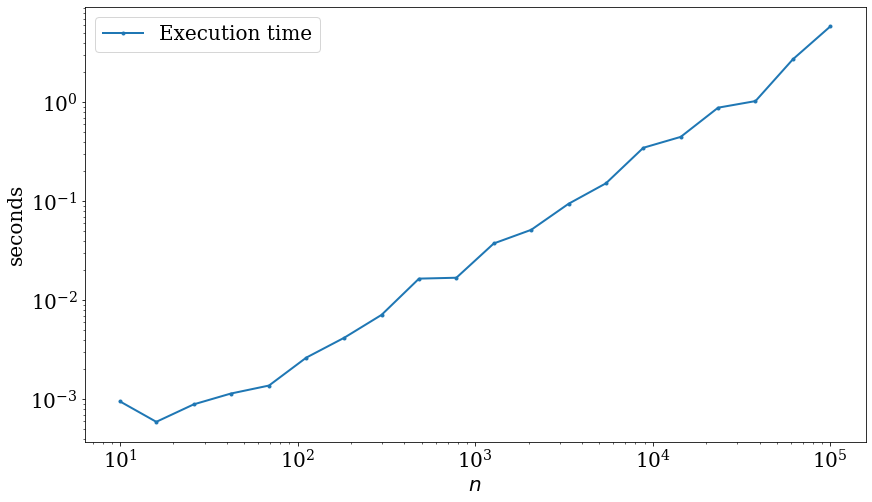

In [5]:
# Calculate scaling with n
def timed_gp_dft(*args, **kwargs):
    t0 = time.time()
    result = gp_dft(*args, **kwargs)
    return result, time.time() - t0


ns = np.logspace(1, 5, 20)
ns = [int(n) for n in ns]
times = np.zeros(len(ns))
for i, n in enumerate(ns):
    t = np.linspace(0, 1, n)
    _, times[i] = timed_gp_dft(t, 100)
fig, ax = plt.subplots()
ax.loglog(ns, times, label="Execution time", marker='.')
ax.set_xlabel("$n$")
ax.set_ylabel("seconds")
ax.legend()
plt.show()